# Feature Descriptors
* Now that we've features, we need to match them. For that we need descriptors.
* Descriptors are descriptions of the locality that'll allow us to find the same feature in the other image (kind of like an address)
* We want the descriptors to be distinctive (able to find easily) and invariant (should not change across images).
  * These are a trade-off, because if it's perfectly invariant, they won't be distinctive
  
## Correlation - A simple solution
* We could just take the features from image 1 and correlate them to all the points in the second image and find the maxima (like we did in chap 1). This is a simple solution but it fails when
  * Correlation is not rotation invariant, so even slight rotations can completely screw up correlation)
  * Correlation is too sensitive to intensity shifts
  * Normalized correlation (which may address intensity shifts) is too sensitive to even very small geometric changes
  * It's going to be painfully slow
  
## SIFT (Scale Invariant Feature Transform)
* Idea is to describe the image as a constellation of local features that are invariant to scale, rotation, translation and other such parameters.
* First we find the orientation of each of these features
  * This is simple, we just take the dominant direction of the gradient used to compute the feature
* We then rotate this keypoint with respect to the dominant direction, thus the dominant direction now becomes the canonical north for this keypoint (feature)
* So we compute a feature vector as a guassian weighted **histogram of gradients**
  * So the gradients in the middle contribute more to the feature orientation that those close to the edges.
* In practice, they split the image as 4x4 and for each region they use 8 directions (8 bins), so thats 16 x 8 (128) values. This 128 values becomes the feature vector for this keypoint
* Another point is to clip the magitude of the gradients with a threshold, so that some gradients don't overflow the bin and overpower the other bins
* The next step is to normalize the vector to have magnitude 1

**SIFT is patented**

# Feature Matching 
Best way is just to brute force and do a nearest neighbor approach and compare

## Python example

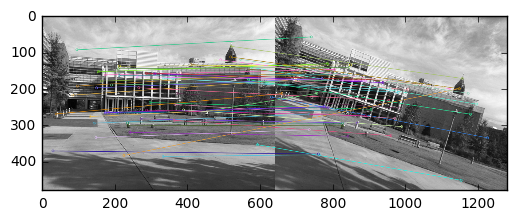

(<matplotlib.image.AxesImage at 0x7fc63129e7b8>, None)

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the two images
img1 = cv2.imread('ProblemSets/ps4/input/simA.jpg')
gray1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('ProblemSets/ps4/input/simB.jpg')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create the sift operator
sift = cv2.xfeatures2d.SIFT_create()

# Detect the keypoints and compute the descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

#img3 = np.zeros((960, 1280, 3))

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

plt.imshow(img3),plt.show()